In [6]:
import scipy.io as sio
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [119]:
def make_plot_top_40(edges):

    top_indices = np.argsort(edges, axis=1)[:, -20:]

    # Create a mask to set all values not in the top 40 to 0
    mask = np.zeros_like(edges)
    rows = np.arange(edges.shape[0])[:, None]
    mask[rows, top_indices] = 1

    # Apply the mask to the original matrix
    result = edges * mask
    
    edges=result
    
    num_nodes = edges.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))

    # Add weighted edges based on the weight matrix
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):  # Only need to add edges for the upper triangular part
            weight = edges[i,j]
            if weight != 0:  # You can customize this condition based on your requirements
                G.add_edge(i, j, weight=weight)
                
         
    #edge_weights = nx.get_edge_attributes(G, 'weight')
    #pos = nx.spring_layout(G)
    nx.draw(G, with_labels=False, node_color=colors, node_size=25, edge_color='black', font_size=15, width=0.1)
    plt.show()

In [137]:
def make_plot_og(edges):

    num_nodes = edges.shape[0]
    G = nx.Graph()
    G.add_nodes_from(range(num_nodes))

    # Add weighted edges based on the weight matrix
    for i in range(num_nodes):
        for j in range(i+1, num_nodes):  # Only need to add edges for the upper triangular part
            weight = edges[i,j]
            if weight != 0:  # You can customize this condition based on your requirements
                G.add_edge(i, j, weight=weight)
                
    nx.draw(G, with_labels=False, node_color=colors, node_size=25, edge_color='black', font_size=15, width=0.001)
    plt.show()

# VLAD

In [130]:
mat_data = sio.loadmat('Raw_butterfly_network.mat')
colors = mat_data['labels'][0]

In [131]:
mat_data_ne = sio.loadmat('W_butterfly_NE.mat')
mat_data_ne_cosine = sio.loadmat('W_butterfly_NE_cos.mat')

noisy_data = sio.loadmat('W_matrix.mat')
noisy_data_cosine = sio.loadmat('pairwise_cosine_new.mat')

edges = np.array(mat_data_ne['W_butterfly_NE']).round(2)
edges_cosine = np.array(mat_data_ne_cosine['W_butterfly_NE']).round(2)

edges_noisy = np.array(noisy_data['W_matrix']).round(2)
edges_cosine_noisy = np.array(noisy_data_cosine['pairwise_cosine_new']).round(2)

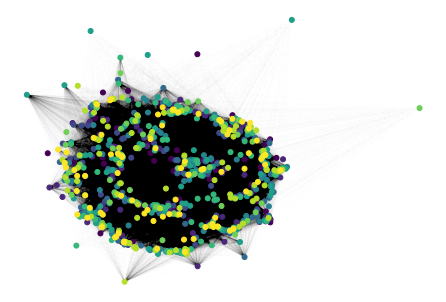

In [138]:
make_plot_og(edges_noisy)

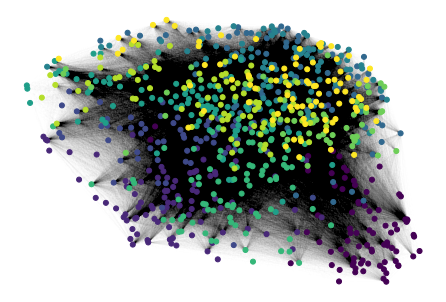

In [141]:
make_plot_og(edges)

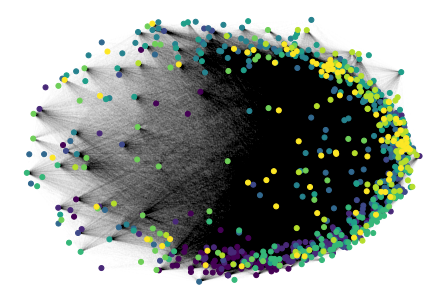

In [142]:
make_plot_og(edges_cosine_noisy)

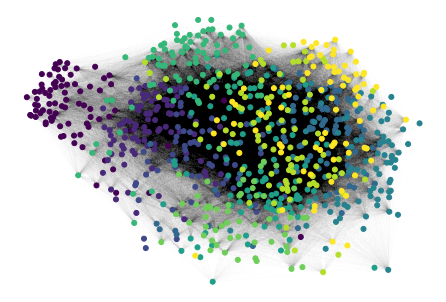

In [139]:
make_plot_og(edges_cosine)

# FV

In [145]:
mat_data_ne_fv = sio.loadmat('W_butterfly_NE_FV_gaussian.mat')
mat_data_ne_cosine_fv = sio.loadmat('W_butterfly_NE_FV_cosine.mat')

noisy_data_fv = sio.loadmat('W_matrix_FV_gaussian.mat')
noisy_data_cosine_fv = sio.loadmat('pairwise_cosine_FV.mat')

edges_fv = np.array(mat_data_ne_fv['W_butterfly_NE']).round(2)
edges_cosine_fv = np.array(mat_data_ne_cosine_fv['W_butterfly_NE']).round(2)

edges_noisy_fv = np.array(noisy_data_fv['W_matrix_FV']).round(2)
edges_cosine_noisy_fv = np.array(noisy_data_cosine_fv['pairwise_cosine_FV']).round(2)

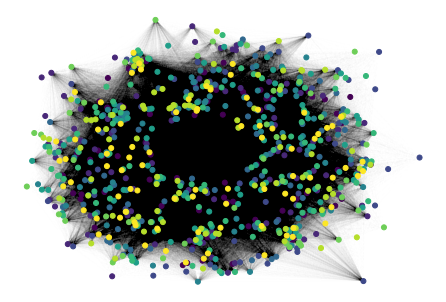

In [146]:
make_plot_og(edges_noisy_fv)

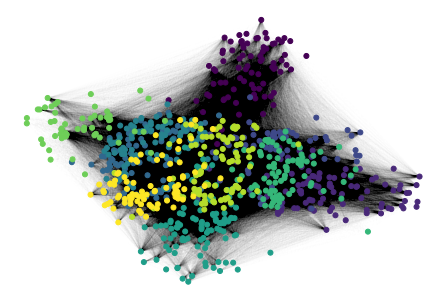

In [147]:
make_plot_og(edges_fv)

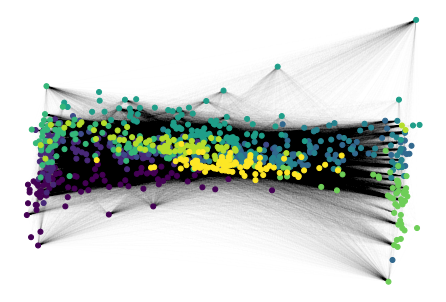

In [148]:
make_plot_og(edges_cosine_noisy_fv)

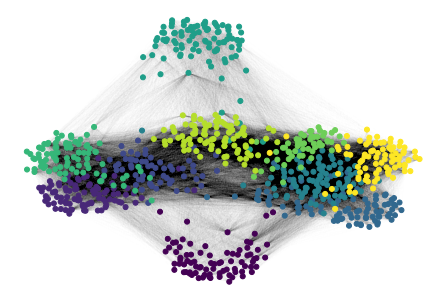

In [149]:
make_plot_og(edges_cosine_fv)